<a href="https://colab.research.google.com/github/Alija2711/assignment/blob/main/clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

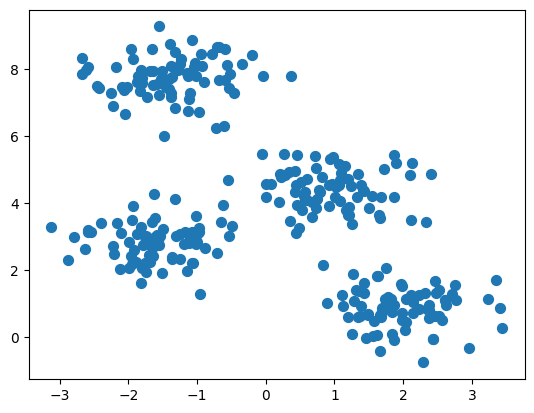

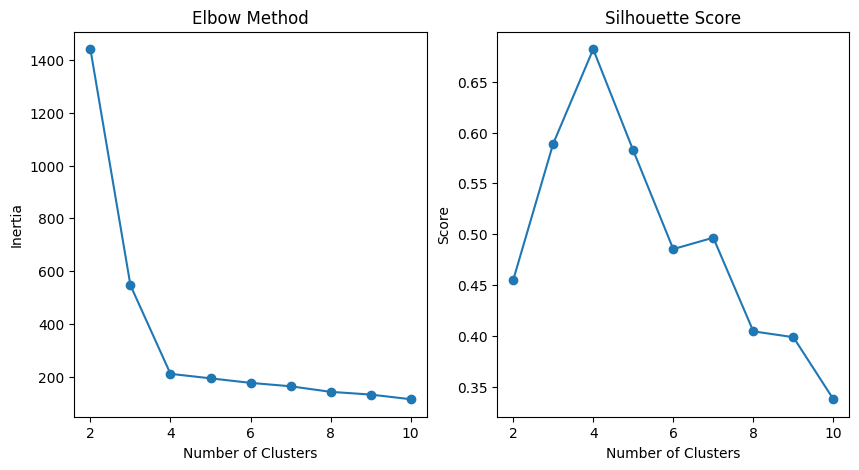

Optimum number of clusters for KMeans: {optimum_clusters_kmean}


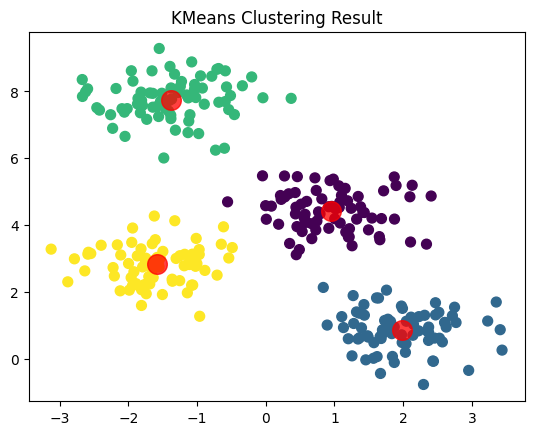

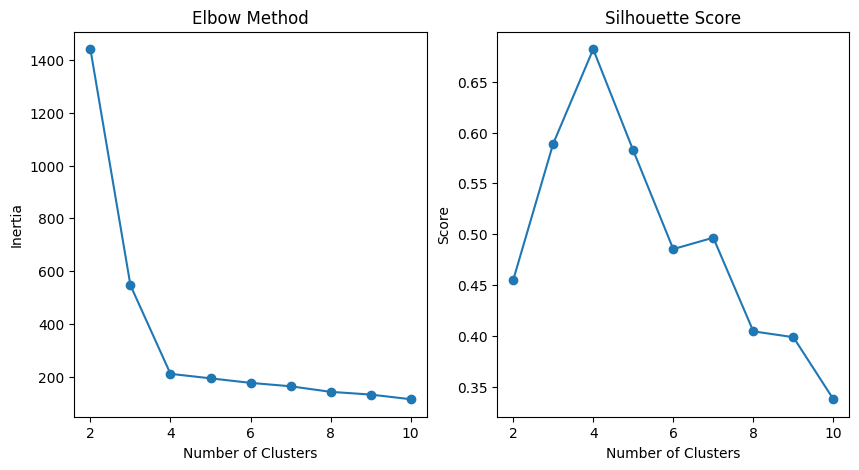

Optimum number of clusters for Agglomerative Clustering: 4


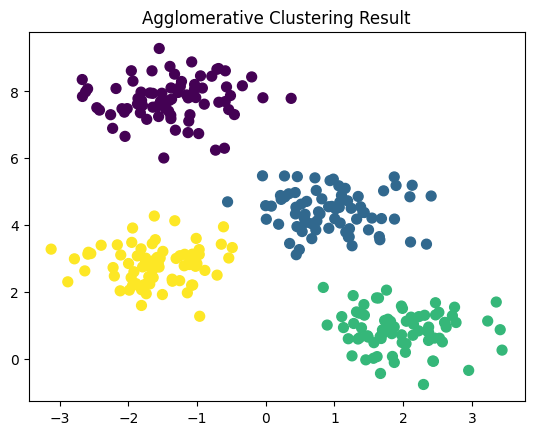

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

def find_optimum_clusters(data, max_clusters=10):
    elbow_scores = []
    silhouette_scores = []

    for n_clusters in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        kmeans.fit(data)
        elbow_scores.append(kmeans.inertia_)
        silhouette_avg = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_clusters+1), elbow_scores, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.show()

    optimum_clusters = np.argmax(silhouette_scores) + 2
    return optimum_clusters
optimum_clusters_kmeans = find_optimum_clusters(X)
print("Optimum number of clusters for KMeans: {optimum_clusters_kmean}")
kmeans = KMeans(n_clusters=optimum_clusters_kmeans, random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title('KMeans Clustering Result')
plt.show()

optimum_clusters_agg = find_optimum_clusters(X)
print(f"Optimum number of clusters for Agglomerative Clustering: {optimum_clusters_agg}")

agg_clustering = AgglomerativeClustering(n_clusters=optimum_clusters_agg)
y_agg = agg_clustering.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_agg, s=50, cmap='viridis')
plt.title('Agglomerative Clustering Result')
plt.show()
